# Perceptron

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random


## Auxiliar functions

In [30]:
def sign(x):
    """Returns the sign of a number."""
    if x > 0:
        return 1
    elif x == 0:
        return 0
    else:
        return -1

def create_database(min_value, max_value, d, number_of_points):
    """Creates a database of random points with a specified range and number of dimensions."""
    return np.random.uniform(min_value, max_value, (number_of_points, d + 2))

def get_target_points(min_value, max_value, d):
    """Generates random points representing the endpoints of a line."""
    return np.random.uniform(min_value, max_value, (2, d))

def get_target_function(point1, point2):
    """Calculates the coefficients of the line passing through two random points."""
    a = (point2[1] - point1[1]) / (point2[0] - point1[0])  # Slope
    b = point1[1] - a * point1[0]  # Intercept
    return [a, b]

def is_above_line(point, coefficients):
    """Checks if a point is above a line defined by its coefficients."""
    return sign(point[1] - (coefficients[0] * point[0] + coefficients[1]))

def target_function_to_database(database, coefficients):
    """Assigns labels to points in the database based on their position relative to a line."""
    for i in range(len(database)):
        x = database[i][1]
        y = database[i][2]

        database[i][0] = 1 # Add x0

        database[i][-1] = is_above_line([x, y], coefficients) # Add yn
    
    return database

def calculate_out_of_sample_error(g, test_database):
    """Calculates the out-of-sample error of a hypothesis."""
    X_test = test_database[:, :3]  
    y_test = test_database[:, -1] 

    predictions = np.sign(X_test @ g)
    error_outside = np.mean(predictions != y_test)
    return error_outside

def pla(target_database, max_iterations, initial_w = None):
    """Performs the Perceptron Learning Algorithm."""
    iterations = 0

    if initial_w is not None:
        w = initial_w
    else: 
        w = np.array([0, 0, 0]) 
    while iterations < max_iterations:
        iterations+=1
        
        misclassified_points_index = []

        for i in range(len(target_database)):
            point = target_database[i]
            if sign(point[:3] @ w) != point[3]:
                misclassified_points_index.append(i)
                
        if len(misclassified_points_index) == 0: # Convergence
            break
        
        random_index = random.choice(misclassified_points_index)        
        misclassified_point = target_database[random_index]

        w = w + (misclassified_point[3] * misclassified_point[:3])
    
    return w,iterations   

def run_pla(d, N, max_iter, number_of_executions, test_size):
    sum_divergence_probability = 0
    sum_iterations = 0

    for i in range(number_of_executions):
        database = create_database(-1, 1, d, N)

        target_points = get_target_points(-1, 1, d)
        coefficients = get_target_function(target_points[0], target_points[1])

        target_database = target_function_to_database(database, coefficients)

        w, iteration = pla(target_database, max_iter)
        
        test_database = create_database(-1, 1, d, test_size)
        target_test_database = target_function_to_database(test_database, coefficients)

        divergence_probability = calculate_out_of_sample_error(w, target_test_database)

        sum_divergence_probability += divergence_probability
        sum_iterations += iteration

    x1 = target_database[:, 1]
    x2 = target_database[:, 2]
    categories = target_database[:, 3]

    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(15, 7))

    # First plot: Função Target - f(x) - Last Iteration
    ax1 = axes[0]
    colors = ['red' if category == -1 else 'blue' for category in categories]
    ax1.scatter(x1, x2, c=colors, marker='o', label='Pontos')
    ax1.set_xlim(-1, 1)
    ax1.set_ylim(-1, 1)
    ax1.set_xlabel('x1')
    ax1.set_ylabel('x2')
    ax1.grid(True)
    ax1.set_title('Target Function - f(x) - Last Iteration')

    x_vals = np.array(ax1.get_xlim())
    y_vals = coefficients[1] + coefficients[0] * x_vals
    ax1.plot(x_vals, y_vals, '--')
    ax1.fill_between(x_vals, y_vals, ax1.get_ylim()[0], color='lightcoral', alpha=0.5)
    ax1.fill_between(x_vals, y_vals, ax1.get_ylim()[1], color='skyblue', alpha=0.5)

    # Second plot: Hipótese g(x)
    ax2 = axes[1]
    x1 = target_test_database[:, 1]
    x2 = target_test_database[:, 2]
    hyphotesis_categories = np.sign(target_test_database[:, :3] @ w)
    colors = ['red' if category == -1 else 'blue' for category in hyphotesis_categories]
    ax2.scatter(x1, x2, c=colors, marker='o', s=2)
    ax2.set_xlim(-1, 1)
    ax2.set_ylim(-1, 1)
    ax2.set_xlabel('Eixo X')
    ax2.set_ylabel('Eixo Y')
    ax2.grid(True)
    ax2.set_title('Hypothesis Function - g(x) - Last Iteration')

    x_vals = np.array(ax2.get_xlim())
    y_vals = (-1 * (w[0] + w[1] * x_vals)) / w[2]
    ax2.plot(x_vals, y_vals, '--')

    real_y_vals = coefficients[1] + coefficients[0] * x_vals
    ax2.fill_between(x_vals, real_y_vals, ax2.get_ylim()[0], color='lightcoral', alpha=0.5)
    ax2.fill_between(x_vals, real_y_vals, ax2.get_ylim()[1], color='skyblue', alpha=0.5)

    plt.tight_layout()
    plt.show()

    return sum_divergence_probability / number_of_executions, sum_iterations / number_of_executions

## 1 - Considere N = 10. Quantas iterações demora, em média, para que o PLA convirja com N = 10 pontos de treinamento? Escolha o valor mais próximo do seu resultado.

## 2 - Qual das alternativas seguintes é mais próxima de P[f(x) ̸= g(x)] para N = 10?

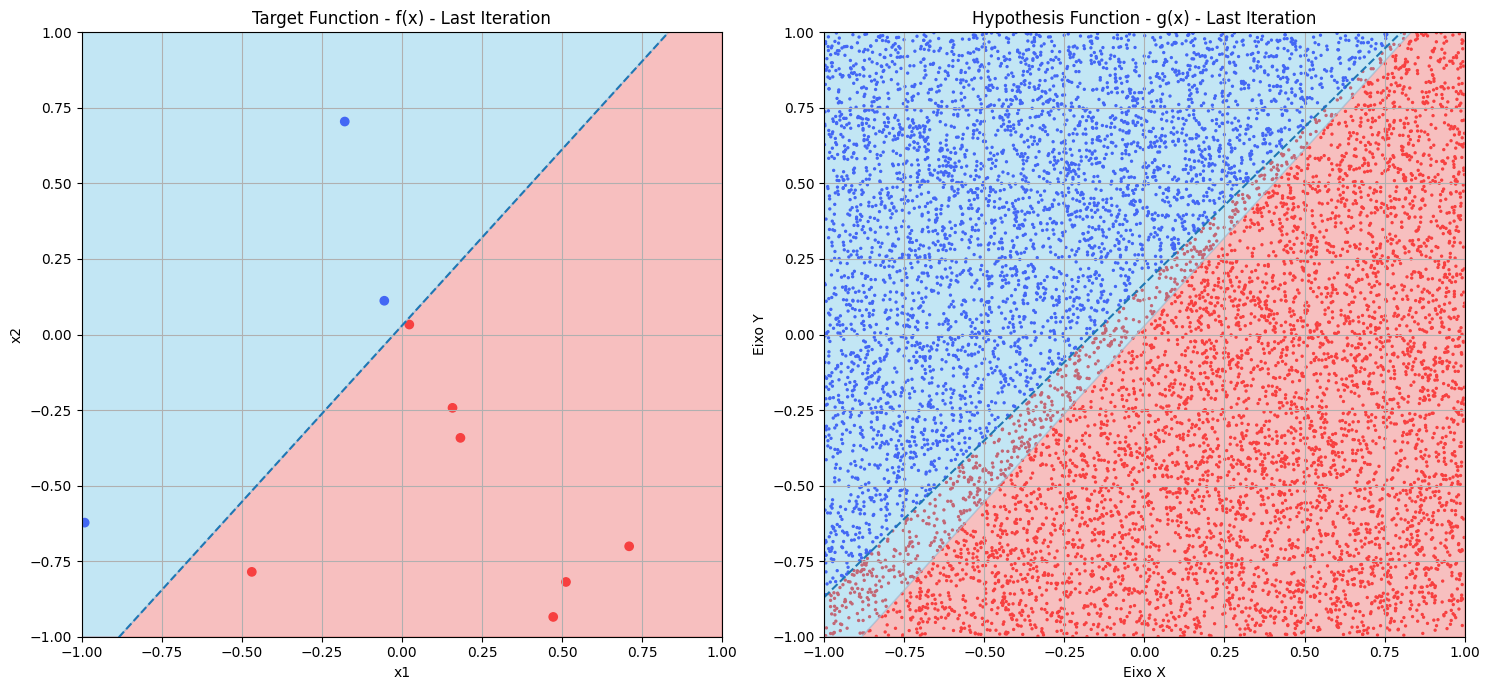

PLA for N = 10
Mean Divergence Probability = 0.10897130000000002
Mean Iterations = 10.045


In [32]:
mean_divergence_probability, mean_iterations = run_pla(d=2,N=10,max_iter=10000,number_of_executions=1000, test_size=10000)
print("PLA for N = 10")
print(f"Mean Divergence Probability = {mean_divergence_probability}")
print(f"Mean Iterations = {mean_iterations}")

## 3 - Agora considere N = 100. Quantas iterações demora, em média, para que o PLA convirja com N = 100 pontos de treinamento? Escolha o valor mais próximo do seu resultado.

## 4 - Qual das alternativas seguintes é mais próxima de P[f(x) ̸= g(x)] para N = 100?

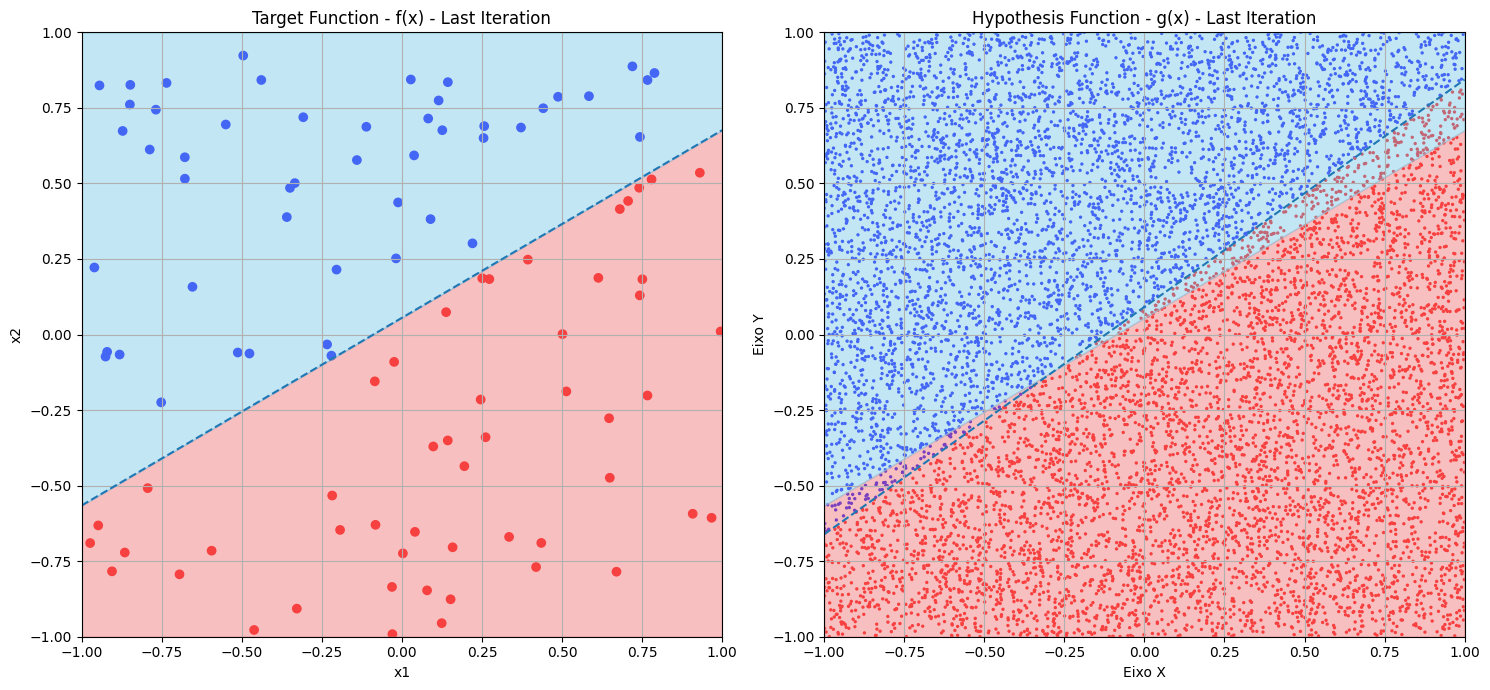

PLA for N = 100
Mean Divergence Probability = 0.013563899999999993
Mean Iterations = 118.078


In [24]:
mean_divergence_probability, mean_iterations = run_pla(d=2,N=100,max_iter=10000,number_of_executions=1000, test_size=10000)
print("PLA for N = 100")
print(f"Mean Divergence Probability = {mean_divergence_probability}")
print(f"Mean Iterations = {mean_iterations}")


## 5 - É possível estabelecer alguma regra para a relação entre N, o número de iterações até a convergência, e P[f(x) ̸= g(x)]?

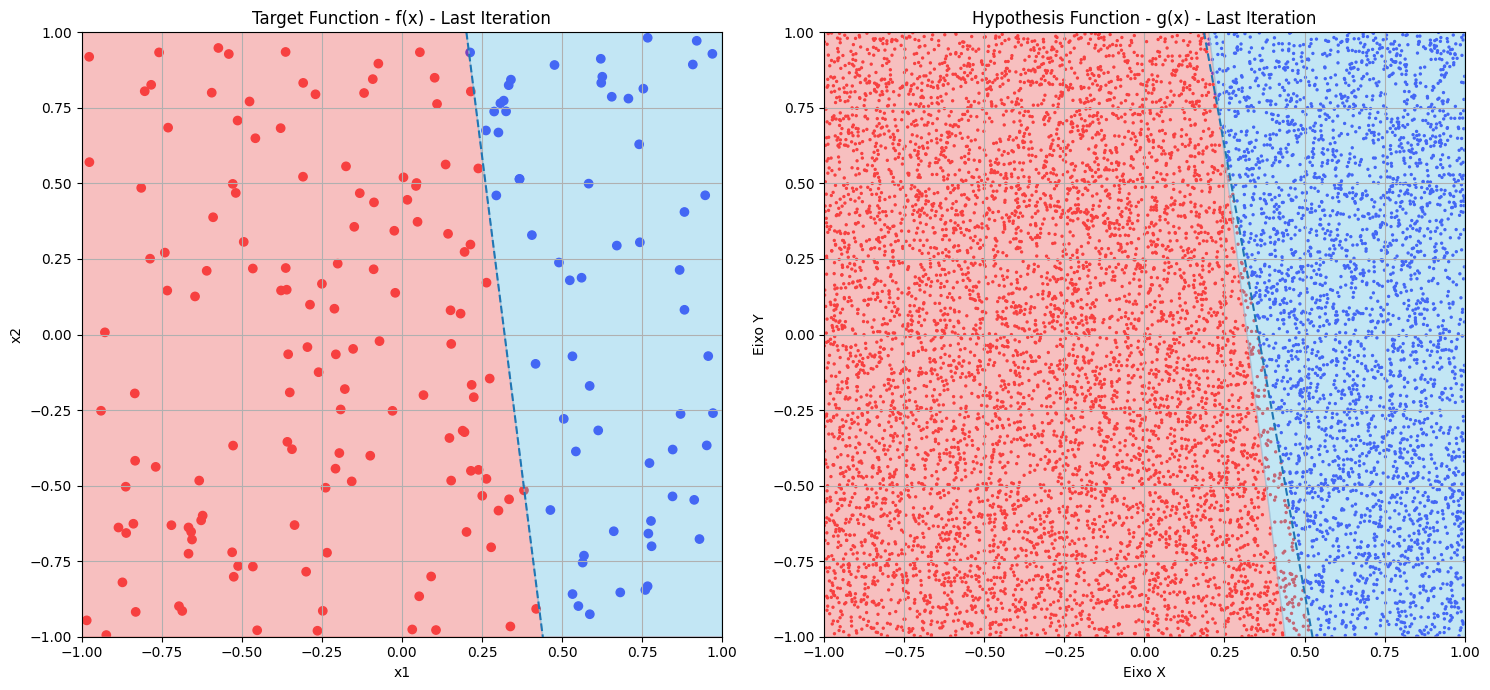

PLA for N = 200
Mean Divergence Probability = 0.006802999999999997
Mean Iterations = 193.046


In [27]:
mean_divergence_probability, mean_iterations = run_pla(d=2,N=200,max_iter=10000,number_of_executions=1000, test_size=10000)
print("PLA for N = 200")
print(f"Mean Divergence Probability = {mean_divergence_probability}")
print(f"Mean Iterations = {mean_iterations}")
